In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Log-normal component

In [2]:
tor_train_df <- read.csv('/home/jeremy/tornadoesr/data/raw/tor_train_set_no_zeros.csv') %>% select(-c(JULIAN_DAY, BEGIN_TIME))
tor_cv_df <- read.csv('/home/jeremy/tornadoesr/data/raw/tor_cv_set_no_zeros.csv') %>% select(-c(JULIAN_DAY, BEGIN_TIME))

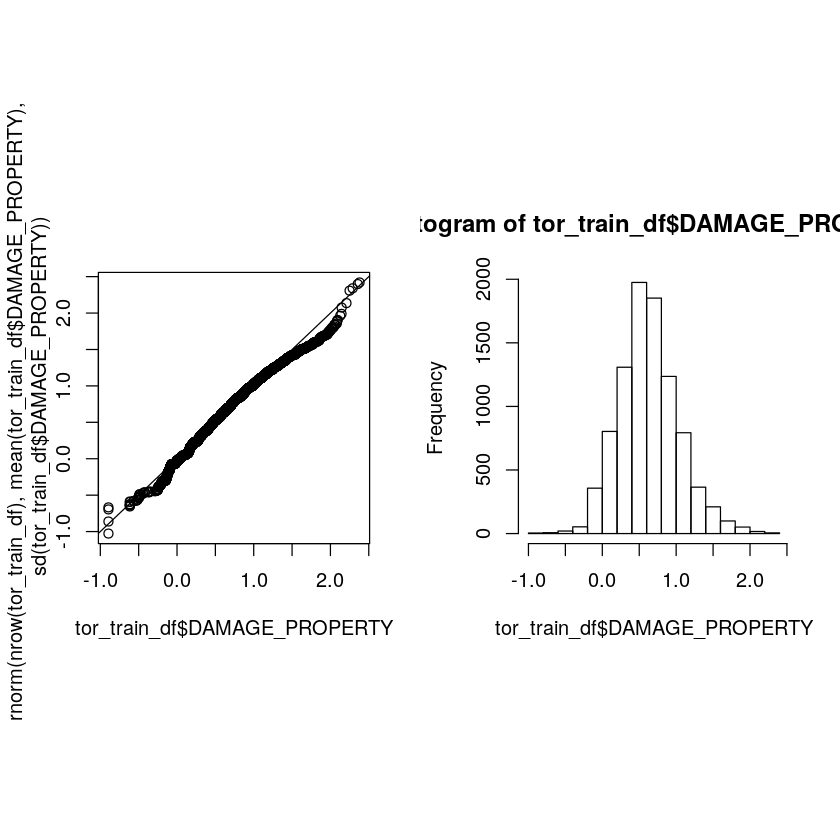

In [3]:
par(mfrow = c(1, 2), pty = 's')
qqplot(tor_train_df$DAMAGE_PROPERTY,
       rnorm(nrow(tor_train_df),
             mean(tor_train_df$DAMAGE_PROPERTY),
             sd(tor_train_df$DAMAGE_PROPERTY)))
abline(0, 1)
hist(tor_train_df$DAMAGE_PROPERTY)

In [4]:
log_norm_fit <- lm(DAMAGE_PROPERTY ~ ., data = tor_train_df)

## Log-normal evaluation

In [5]:
cv_yhat <- predict(log_norm_fit, newdata = tor_cv_df)

Warning message in predict.lm(log_norm_fit, newdata = tor_cv_df):
“prediction from a rank-deficient fit may be misleading”

In [6]:
cor(cv_yhat, tor_cv_df$DAMAGE_PROPERTY)^2

[1] 0.4134979

# Logistic fit

In [7]:
library(pROC)

Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var



In [8]:
tor_train_df <- read.csv('/home/jeremy/tornadoesr/data/raw/tor_train_set.csv') %>% select(-c(JULIAN_DAY, BEGIN_TIME))
tor_cv_df <- read.csv('/home/jeremy/tornadoesr/data/raw/tor_cv_set.csv') %>% select(-c(JULIAN_DAY, BEGIN_TIME))

In [9]:
tor_train_df$DAMAGE_PROPERTY <- as.numeric(tor_train_df$DAMAGE_PROPERTY == min(tor_train_df$DAMAGE_PROPERTY))
tor_cv_df$DAMAGE_PROPERTY <- as.numeric(tor_cv_df$DAMAGE_PROPERTY == min(tor_cv_df$DAMAGE_PROPERTY))

In [10]:
logistic_fit <- glm(DAMAGE_PROPERTY ~ ., data = tor_train_df, family = 'binomial')

In [11]:
cv_yhat <- predict(logistic_fit, newdata = tor_cv_df, type = 'response')

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

## Logistic evaluation

In [12]:
roc_obj <- roc(tor_cv_df$DAMAGE_PROPERTY, cv_yhat)
auc(roc_obj)

Area under the curve: 0.8527

In [13]:
sum(tor_cv_df$DAMAGE_PROPERTY == round(cv_yhat)) / nrow(tor_cv_df)

[1] 0.8131519